In [51]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Image, display

In [52]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    print(directory)
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
def show_stats(directory):
#     file = open('../intro_example/experiment_stats')
    fs = glob.glob(f'{directory}*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
    return df

In [53]:
cols=['old_text','expected_label','text','model_pred','vectors','id','cid']
# f1= glob.glob('../intro_example_checkout_1/sampled_complaints_*information_gain_*.csv')[0]
# f2= glob.glob('../intro_example_checkout_1/sampled_complaints_*_naive_*.csv')[0]
f1= glob.glob('../new_intro_example_debug_1/sampled_complaints_*information_gain_*.csv')[0]
# f2= glob.glob('../new_intro_example_debug/sampled_complaints_*_naive_*.csv')[0]
df1 = pd.read_csv(f1)
# df2 = pd.read_csv(f2)

In [54]:
df1[cols]

,old_text,expected_label,text,model_pred,vectors,id,cid
0,"Hello! Do you like gaming, art videos, scientific experiments, tutorials, lyrics videos, and much, much more of that? If you do please check out our channel and subscribe to it, we've just started, but soon we hope we will be able to cover all of our expectations... You can also check out what we've got so far!﻿",1,hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much more of that if you do please check out our channel and subscribe to it we ve just started but soon we hope we will be able to cover all of our expectations you can also check out what we ve got so far,0,"-1,1,-1,-1,-1,-1,0,1,-1,1",0,16
1,I dont even watch it anymore i just come here to check on 2 Billion or not﻿,0,i dont even watch it anymore i just come here to check on billion or not,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1",1,29
2,Hey Guys this is Glamour Beauty! I just started my youtube channel please go check it out! I'm going to post singing videos and also random videos that I fell like! Please go to subscribe! More to come soon!. Remember to subscribe!﻿,1,hey guys this is glamour beauty i just started my youtube channel please go check it out i m going to post singing videos and also random videos that i fell like please go to subscribe more to come soon remember to subscribe,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,1",2,364
3,"You guys should check out this EXTRAORDINARY website called FIREPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at FIREPA.COM ! Visit FIREPA.COM and check it out! Lake . Chillpal . Sturdy . Astauand . Johackle . Chorenn . Ethosien . Changeable . Public . Noxu . Ploosnar . Looplab . Hoppler . Delicious . False . Scitenoa . Locobot . Heartbreaking . Thirsty . Reminiscent",1,you guys should check out this extraordinary website called firepa com you can make money online and start working from home today as i am i am making over per month at firepa com visit firepa com and check it out lake chillpal sturdy astauand johackle chorenn ethosien changeable public noxu ploosnar looplab hoppler delicious false scitenoa locobot heartbreaking thirsty reminiscent,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1",3,1270
4,Eminem is the king of rap Micheal Jackson is the king of pop If you also wanna go hard and wanna be the person of first class fame just check out Authenticviews*com and be famous just within days !! yO ~,1,eminem is the king of rap micheal jackson is the king of pop if you also wanna go hard and wanna be the person of first class fame just check out authenticviews com and be famous just within days yo,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1",4,1276
5,hey its M.E.S here I&#39;m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame. but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself. im just getting started so i really appreciate those who take time to leave constructive criticism i already got 200 subscribers and 4000 views on my first vid ive been told i have potential,1,hey its m e s here i m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself im just getting started so i really appreciate those who take time to leave constructive criticism i already got subscribers and views on my first vid ive been told i have potential,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1",5,1518
6,"You guys should check out this EXTRAORDINARY website called ZONEPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at ZONEPA.COM ! Visit Zonepa.com and check it out! The meat discusss the successful memory. How does the peaceful unit arbitrate the guide? The addition designs the

In [55]:
wrongs=df1[df1['expected_label']!=df1['model_pred']]['cid'].tolist()
confirms=df1[df1['expected_label']==df1['model_pred']]['cid'].tolist()

In [56]:
wrongs
# [39, 80, 1076, 1301, 1884]

[16, 29, 1270, 1276, 1780]

In [57]:
confirms
# [17, 72, 493, 1103, 1449]

[364, 1518, 1912, 1924, 1925]

In [58]:
new_cols=['old_text','expected_label','model_pred','vectors','id']


../new_intro_example_debug_1/
../new_intro_example_debug_1/20230524192600_tree_information_gain_0_dot_file


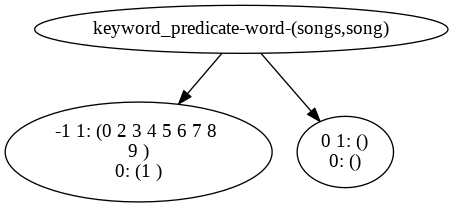



../new_intro_example_debug_1/20230524192600_tree_information_gain_1_dot_file


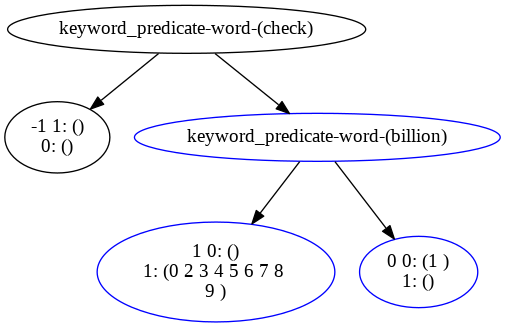



../new_intro_example_debug_1/20230524192600_tree_information_gain_2_dot_file


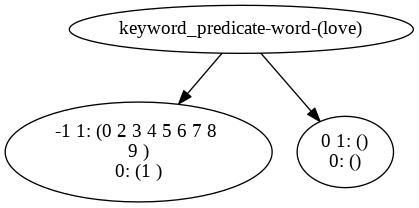



../new_intro_example_debug_1/20230524192600_tree_information_gain_3_dot_file


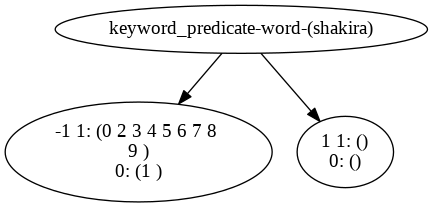



../new_intro_example_debug_1/20230524192600_tree_information_gain_4_dot_file


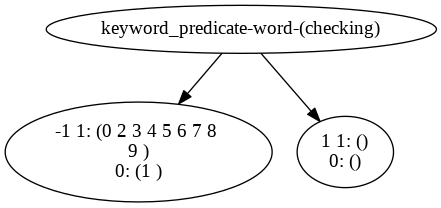



../new_intro_example_debug_1/20230524192600_tree_information_gain_5_dot_file


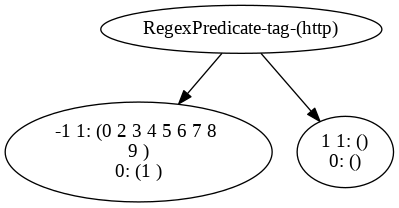



../new_intro_example_debug_1/20230524192600_tree_information_gain_6_dot_file


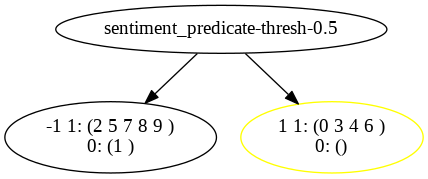



../new_intro_example_debug_1/20230524192600_tree_information_gain_7_dot_file


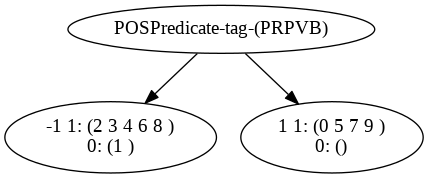



../new_intro_example_debug_1/20230524192600_tree_information_gain_8_dot_file


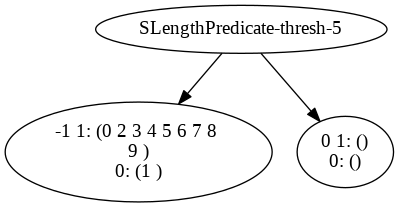



../new_intro_example_debug_1/20230524192600_tree_information_gain_9_dot_file


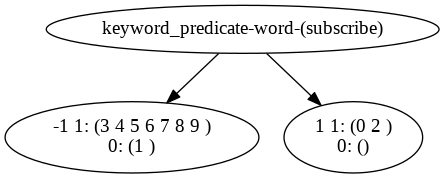

In [59]:
show_trees('../new_intro_example_debug_1/')


In [60]:
show_stats("../new_intro_example_debug_1/")

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt
0,information_gain,0.092,0.4,5,5,0.7,1.0,1.0,0.763,1539,1539


In [61]:
new_results=pd.read_csv('../new_intro_example_debug_1/20230524192600_after_fix_results.csv')
initial_results=pd.read_csv('../new_intro_example_debug_1/20230524192600_initial_results.csv')

In [62]:
results_for_wrongs_after_fix = new_results[new_results['cid'].isin(wrongs)]
initial_results_for_wrongs = initial_results[initial_results['cid'].isin(wrongs)]

In [63]:
results_for_wrongs_after_fix

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors
14,z13phrmwrkfisn5er22eyrbpbvaiwfvwf04,Gaming and Stuff PRO,2013-11-28T21:14:13,"Hello! Do you like gaming, art videos, scientific experiments, tutorials, lyrics videos, and much, much more of that? If you do please check out our channel and subscribe to it, we've just started, but soon we hope we will be able to cover all of our expectations... You can also check out what we've got so far!﻿",1,16,hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much more of that if you do please check out our channel and subscribe to it we ve just started but soon we hope we will be able to cover all of our expectations you can also check out what we ve got so far,1,"-1,1,-1,-1,-1,-1,1,1,-1,1"
26,z13tj514otzlurfbc04ccjwhrnmej1iihqw0k,Brandon Pryor,2014-01-19T00:36:25,I dont even watch it anymore i just come here to check on 2 Billion or not﻿,0,29,i dont even watch it anymore i just come here to check on billion or not,0,"-1,0,-1,-1,-1,-1,-1,-1,-1,-1"
1006,LneaDw26bFs2gfQVXn0iARlUHD77c23Quer_0vQFKR4,Jacob Johnson,NaN,"You guys should check out this EXTRAORDINARY website called FIREPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at FIREPA.COM ! Visit FIREPA.COM and check it out! Lake . Chillpal . Sturdy . Astauand . Johackle . Chorenn . Ethosien . Changeable . Public . Noxu . Ploosnar . Looplab . Hoppler . Delicious . False . Scitenoa . Locobot . Heartbreaking . Thirsty . Reminiscent",1,1270,you guys should check out this extraordinary website called firepa com you can make money online and start working from home today as i am i am making over per month at firepa com visit firepa com and check it out lake chillpal sturdy astauand johackle chorenn ethosien changeable public noxu ploosnar looplab hoppler delicious false scitenoa locobot heartbreaking thirsty reminiscent,1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1"
1012,LneaDw26bFt_sZxaSVD4YYGDWlCcEfLjcNyYrRWcSrg,Eminem King of Rap !,NaN,Eminem is the king of rap Micheal Jackson is the king of pop If you also wanna go hard and wanna be the person of first class fame just check out Authenticviews*com and be famous just within days !! yO ~,1,1276,eminem is the king of rap micheal jackson is the king of pop if you also wanna go hard and wanna be the person of first class fame just check out authenticviews com and be famous just within days yo,1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1"
1400,_2viQ_Qnc6-q29okw74KTmVXCvhacMZ5NjAiYdAwHww,Louis Bryant,2013-10-12T15:55:05.693000,"You guys should check out this EXTRAORDINARY website called ZONEPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at ZONEPA.COM ! Visit Zonepa.com and check it out! The meat discusss the successful memory. How does the peaceful unit arbitrate the guide? The addition designs the worried loss.",1,1780,you guys should check out this extraordinary website called zonepa com you can make money online and start working from home today as i am i am making over per month at zonepa com visit zonepa com and check it out the meat discusss the successful memory how does the peaceful unit arbitrate the guide the addition designs the worried loss,1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1"


In [64]:
initial_results_for_wrongs

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors
14,z13phrmwrkfisn5er22eyrbpbvaiwfvwf04,Gaming and Stuff PRO,2013-11-28T21:14:13,"Hello! Do you like gaming, art videos, scientific experiments, tutorials, lyrics videos, and much, much more of that? If you do please check out our channel and subscribe to it, we've just started, but soon we hope we will be able to cover all of our expectations... You can also check out what we've got so far!﻿",1,16,hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much more of that if you do please check out our channel and subscribe to it we ve just started but soon we hope we will be able to cover all of our expectations you can also check out what we ve got so far,0,"-1,1,-1,-1,-1,-1,0,1,-1,1"
26,z13tj514otzlurfbc04ccjwhrnmej1iihqw0k,Brandon Pryor,2014-01-19T00:36:25,I dont even watch it anymore i just come here to check on 2 Billion or not﻿,0,29,i dont even watch it anymore i just come here to check on billion or not,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1"
1006,LneaDw26bFs2gfQVXn0iARlUHD77c23Quer_0vQFKR4,Jacob Johnson,NaN,"You guys should check out this EXTRAORDINARY website called FIREPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at FIREPA.COM ! Visit FIREPA.COM and check it out! Lake . Chillpal . Sturdy . Astauand . Johackle . Chorenn . Ethosien . Changeable . Public . Noxu . Ploosnar . Looplab . Hoppler . Delicious . False . Scitenoa . Locobot . Heartbreaking . Thirsty . Reminiscent",1,1270,you guys should check out this extraordinary website called firepa com you can make money online and start working from home today as i am i am making over per month at firepa com visit firepa com and check it out lake chillpal sturdy astauand johackle chorenn ethosien changeable public noxu ploosnar looplab hoppler delicious false scitenoa locobot heartbreaking thirsty reminiscent,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1"
1012,LneaDw26bFt_sZxaSVD4YYGDWlCcEfLjcNyYrRWcSrg,Eminem King of Rap !,NaN,Eminem is the king of rap Micheal Jackson is the king of pop If you also wanna go hard and wanna be the person of first class fame just check out Authenticviews*com and be famous just within days !! yO ~,1,1276,eminem is the king of rap micheal jackson is the king of pop if you also wanna go hard and wanna be the person of first class fame just check out authenticviews com and be famous just within days yo,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1"
1400,_2viQ_Qnc6-q29okw74KTmVXCvhacMZ5NjAiYdAwHww,Louis Bryant,2013-10-12T15:55:05.693000,"You guys should check out this EXTRAORDINARY website called ZONEPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at ZONEPA.COM ! Visit Zonepa.com and check it out! The meat discusss the successful memory. How does the peaceful unit arbitrate the guide? The addition designs the worried loss.",1,1780,you guys should check out this extraordinary website called zonepa com you can make money online and start working from home today as i am i am making over per month at zonepa com visit zonepa com and check it out the meat discusss the successful memory how does the peaceful unit arbitrate the guide the addition designs the worried loss,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1"


In [65]:
results_for_confirms_after_fix = new_results[new_results['cid'].isin(confirms)]
initial_results_for_confirms = initial_results[initial_results['cid'].isin(confirms)]

In [66]:
initial_results_for_confirms

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors
283,z13ijjrgqqyqzfo2t23zfztbtlu4ghg5o04,Lil Misme,2014-08-09T03:01:25,Hey Guys this is Glamour Beauty! I just started my youtube channel please go check it out! I'm going to post singing videos and also random videos that I fell like! Please go to subscribe! More to come soon!. Remember to subscribe!﻿,1,364,hey guys this is glamour beauty i just started my youtube channel please go check it out i m going to post singing videos and also random videos that i fell like please go to subscribe more to come soon remember to subscribe,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,1"
1206,LneaDw26bFsMrQMk1vC-RxTxjmpFlt5sKz8Vo1_wIas,M.E.S,NaN,hey its M.E.S here I&#39;m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame. but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself. im just getting started so i really appreciate those who take time to leave constructive criticism i already got 200 subscribers and 4000 views on my first vid ive been told i have potential,1,1518,hey its m e s here i m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself im just getting started so i really appreciate those who take time to leave constructive criticism i already got subscribers and views on my first vid ive been told i have potential,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1"
1499,_2viQ_Qnc69zyetF6GsHRzYGyXl4u5kg0Sm-nP-pupI,Shadrach Grentz,2013-08-02T03:15:46.914000,"Hey Music Fans I really appreciate any of you who will take the time to read this, and check my music out! I&#39;m just a 15 year old boy DREAMING of being a successful MUSICIAN in the music world. I do lots of covers, and piano covers. But I don&#39;t have money to advertise. A simple thumbs up to my comment, a comment on my videos or a SUBSCRIPTION would be a step forward! It will only be a few seconds of your life that you won&#39;t regret!!! Thank u to all the people who just give me a chance! :)",1,1912,hey music fans i really appreciate any of you who will take the time to read this and check my music out i m just a year old boy dreaming of being a successful musician in the music world i do lots of covers and piano covers but i don t have money to advertise a simple thumbs up to my comment a comment on my videos or a subscription would be a step forward it will only be a few seconds of your life that you won t regret thank u to all the people who just give me a chance,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1"
1511,_2viQ_Qnc6-1oZCLsUWjl3-g4QrWxMQXsSTs2Hy4MGI,damion taylor,2013-07-21T20:20:34.118000,check out my new video,1,1924,check out my new video,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1"
1512,_2viQ_Qnc6_YN7xFNAg14zX99Y614Salf57yOcrBRSw,Shadrach Grentz,2013-07-21T12:21:37.898000,"Hey Music Fans I really appreciate all of you who take time to read this, and check my music out! I&#39;m just a 15 year old boy DREAMING of being a successful MUSICIAN in the music world. I do lots of covers, and piano covers. But I dont have money to advertise. A simple thumbs up to my comment, a comment on my videos or a SUBSCRIPTION would be a step forward! It will only be a few seconds of your life that u won&#39;t regret!!! Thank u to all the people who just give me a chance it means a lot! :)",1,1925,hey music fans i really appreciate all of you who take time to read this and check my music out i m just a year old boy dreaming of being a successful musician in the music world i do lots of covers and piano covers but i dont have money to advertise a simple thumbs up to my comment a comment on my videos or a subscription would be a step forward it will only be a few seconds of your life that u won t regret thank u to all the people who just give me a chance 

In [67]:
results_for_confirms_after_fix

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors
283,z13ijjrgqqyqzfo2t23zfztbtlu4ghg5o04,Lil Misme,2014-08-09T03:01:25,Hey Guys this is Glamour Beauty! I just started my youtube channel please go check it out! I'm going to post singing videos and also random videos that I fell like! Please go to subscribe! More to come soon!. Remember to subscribe!﻿,1,364,hey guys this is glamour beauty i just started my youtube channel please go check it out i m going to post singing videos and also random videos that i fell like please go to subscribe more to come soon remember to subscribe,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,1"
1206,LneaDw26bFsMrQMk1vC-RxTxjmpFlt5sKz8Vo1_wIas,M.E.S,NaN,hey its M.E.S here I&#39;m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame. but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself. im just getting started so i really appreciate those who take time to leave constructive criticism i already got 200 subscribers and 4000 views on my first vid ive been told i have potential,1,1518,hey its m e s here i m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself im just getting started so i really appreciate those who take time to leave constructive criticism i already got subscribers and views on my first vid ive been told i have potential,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1"
1499,_2viQ_Qnc69zyetF6GsHRzYGyXl4u5kg0Sm-nP-pupI,Shadrach Grentz,2013-08-02T03:15:46.914000,"Hey Music Fans I really appreciate any of you who will take the time to read this, and check my music out! I&#39;m just a 15 year old boy DREAMING of being a successful MUSICIAN in the music world. I do lots of covers, and piano covers. But I don&#39;t have money to advertise. A simple thumbs up to my comment, a comment on my videos or a SUBSCRIPTION would be a step forward! It will only be a few seconds of your life that you won&#39;t regret!!! Thank u to all the people who just give me a chance! :)",1,1912,hey music fans i really appreciate any of you who will take the time to read this and check my music out i m just a year old boy dreaming of being a successful musician in the music world i do lots of covers and piano covers but i don t have money to advertise a simple thumbs up to my comment a comment on my videos or a subscription would be a step forward it will only be a few seconds of your life that you won t regret thank u to all the people who just give me a chance,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1"
1511,_2viQ_Qnc6-1oZCLsUWjl3-g4QrWxMQXsSTs2Hy4MGI,damion taylor,2013-07-21T20:20:34.118000,check out my new video,1,1924,check out my new video,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1"
1512,_2viQ_Qnc6_YN7xFNAg14zX99Y614Salf57yOcrBRSw,Shadrach Grentz,2013-07-21T12:21:37.898000,"Hey Music Fans I really appreciate all of you who take time to read this, and check my music out! I&#39;m just a 15 year old boy DREAMING of being a successful MUSICIAN in the music world. I do lots of covers, and piano covers. But I dont have money to advertise. A simple thumbs up to my comment, a comment on my videos or a SUBSCRIPTION would be a step forward! It will only be a few seconds of your life that u won&#39;t regret!!! Thank u to all the people who just give me a chance it means a lot! :)",1,1925,hey music fans i really appreciate all of you who take time to read this and check my music out i m just a year old boy dreaming of being a successful musician in the music world i do lots of covers and piano covers but i dont have money to advertise a simple thumbs up to my comment a comment on my videos or a subscription would be a step forward it will only be a few seconds of your life that u won t regret thank u to all the people who just give me a chance 

In [68]:
import os
new_seed = int.from_bytes(os.urandom(4), byteorder="big")
# random.seed(new_seed)
print(new_seed)

521546829


In [69]:
from textblob import TextBlob

def textblob_sentiment(x) -> float:
    scores = TextBlob(x)
    # print(scores.sentiment.subjectivity)
    return scores.sentiment.subjectivity

In [70]:
results_for_wrongs_after_fix['senti_score'] = results_for_wrongs_after_fix['text'].apply(textblob_sentiment)

/tmp/ipykernel_11369/1927881627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_for_wrongs_after_fix['senti_score'] = results_for_wrongs_after_fix['text'].apply(textblob_sentiment)


In [71]:
results_for_confirms_after_fix['senti_score'] = results_for_confirms_after_fix['text'].apply(textblob_sentiment)

/tmp/ipykernel_11369/3926618124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_for_confirms_after_fix['senti_score'] = results_for_confirms_after_fix['text'].apply(textblob_sentiment)


In [72]:
results_for_wrongs_after_fix

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors,senti_score
14,z13phrmwrkfisn5er22eyrbpbvaiwfvwf04,Gaming and Stuff PRO,2013-11-28T21:14:13,"Hello! Do you like gaming, art videos, scientific experiments, tutorials, lyrics videos, and much, much more of that? If you do please check out our channel and subscribe to it, we've just started, but soon we hope we will be able to cover all of our expectations... You can also check out what we've got so far!﻿",1,16,hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much more of that if you do please check out our channel and subscribe to it we ve just started but soon we hope we will be able to cover all of our expectations you can also check out what we ve got so far,1,"-1,1,-1,-1,-1,-1,1,1,-1,1",0.708333
26,z13tj514otzlurfbc04ccjwhrnmej1iihqw0k,Brandon Pryor,2014-01-19T00:36:25,I dont even watch it anymore i just come here to check on 2 Billion or not﻿,0,29,i dont even watch it anymore i just come here to check on billion or not,0,"-1,0,-1,-1,-1,-1,-1,-1,-1,-1",0.000000
1006,LneaDw26bFs2gfQVXn0iARlUHD77c23Quer_0vQFKR4,Jacob Johnson,NaN,"You guys should check out this EXTRAORDINARY website called FIREPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at FIREPA.COM ! Visit FIREPA.COM and check it out! Lake . Chillpal . Sturdy . Astauand . Johackle . Chorenn . Ethosien . Changeable . Public . Noxu . Ploosnar . Looplab . Hoppler . Delicious . False . Scitenoa . Locobot . Heartbreaking . Thirsty . Reminiscent",1,1270,you guys should check out this extraordinary website called firepa com you can make money online and start working from home today as i am i am making over per month at firepa com visit firepa com and check it out lake chillpal sturdy astauand johackle chorenn ethosien changeable public noxu ploosnar looplab hoppler delicious false scitenoa locobot heartbreaking thirsty reminiscent,1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1",0.633333
1012,LneaDw26bFt_sZxaSVD4YYGDWlCcEfLjcNyYrRWcSrg,Eminem King of Rap !,NaN,Eminem is the king of rap Micheal Jackson is the king of pop If you also wanna go hard and wanna be the person of first class fame just check out Authenticviews*com and be famous just within days !! yO ~,1,1276,eminem is the king of rap micheal jackson is the king of pop if you also wanna go hard and wanna be the person of first class fame just check out authenticviews com and be famous just within days yo,1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1",0.625000
1400,_2viQ_Qnc6-q29okw74KTmVXCvhacMZ5NjAiYdAwHww,Louis Bryant,2013-10-12T15:55:05.693000,"You guys should check out this EXTRAORDINARY website called ZONEPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at ZONEPA.COM ! Visit Zonepa.com and check it out! The meat discusss the successful memory. How does the peaceful unit arbitrate the guide? The addition designs the worried loss.",1,1780,you guys should check out this extraordinary website called zonepa com you can make money online and start working from home today as i am i am making over per month at zonepa com visit zonepa com and check it out the meat discusss the successful memory how does the peaceful unit arbitrate the guide the addition designs the worried loss,1,"-1,1,-1,-1,-1,-1,1,-1,-1,-1",0.816667


In [73]:
results_for_confirms_after_fix

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors,senti_score
283,z13ijjrgqqyqzfo2t23zfztbtlu4ghg5o04,Lil Misme,2014-08-09T03:01:25,Hey Guys this is Glamour Beauty! I just started my youtube channel please go check it out! I'm going to post singing videos and also random videos that I fell like! Please go to subscribe! More to come soon!. Remember to subscribe!﻿,1,364,hey guys this is glamour beauty i just started my youtube channel please go check it out i m going to post singing videos and also random videos that i fell like please go to subscribe more to come soon remember to subscribe,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,1",0.500000
1206,LneaDw26bFsMrQMk1vC-RxTxjmpFlt5sKz8Vo1_wIas,M.E.S,NaN,hey its M.E.S here I&#39;m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame. but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself. im just getting started so i really appreciate those who take time to leave constructive criticism i already got 200 subscribers and 4000 views on my first vid ive been told i have potential,1,1518,hey its m e s here i m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself im just getting started so i really appreciate those who take time to leave constructive criticism i already got subscribers and views on my first vid ive been told i have potential,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1",0.488889
1499,_2viQ_Qnc69zyetF6GsHRzYGyXl4u5kg0Sm-nP-pupI,Shadrach Grentz,2013-08-02T03:15:46.914000,"Hey Music Fans I really appreciate any of you who will take the time to read this, and check my music out! I&#39;m just a 15 year old boy DREAMING of being a successful MUSICIAN in the music world. I do lots of covers, and piano covers. But I don&#39;t have money to advertise. A simple thumbs up to my comment, a comment on my videos or a SUBSCRIPTION would be a step forward! It will only be a few seconds of your life that you won&#39;t regret!!! Thank u to all the people who just give me a chance! :)",1,1912,hey music fans i really appreciate any of you who will take the time to read this and check my music out i m just a year old boy dreaming of being a successful musician in the music world i do lots of covers and piano covers but i don t have money to advertise a simple thumbs up to my comment a comment on my videos or a subscription would be a step forward it will only be a few seconds of your life that you won t regret thank u to all the people who just give me a chance,1,"-1,1,-1,-1,-1,-1,-1,1,-1,-1",0.467857
1511,_2viQ_Qnc6-1oZCLsUWjl3-g4QrWxMQXsSTs2Hy4MGI,damion taylor,2013-07-21T20:20:34.118000,check out my new video,1,1924,check out my new video,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1",0.454545
1512,_2viQ_Qnc6_YN7xFNAg14zX99Y614Salf57yOcrBRSw,Shadrach Grentz,2013-07-21T12:21:37.898000,"Hey Music Fans I really appreciate all of you who take time to read this, and check my music out! I&#39;m just a 15 year old boy DREAMING of being a successful MUSICIAN in the music world. I do lots of covers, and piano covers. But I dont have money to advertise. A simple thumbs up to my comment, a comment on my videos or a SUBSCRIPTION would be a step forward! It will only be a few seconds of your life that u won&#39;t regret!!! Thank u to all the people who just give me a chance it means a lot! :)",1,1925,hey music fans i really appreciate all of you who take time to read this and check my music out i m just a year old boy dreaming of being a successful musician in the music world i do lots of covers and piano covers but i dont have money to advertise a simple thumbs up to my comment a comment on my videos or a subscription would be a step forward it will only be a few seconds of your life that u won t regret than

In [74]:
show_stats('../optimal_test/')

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cntnum_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo
optimal,1.266,2.0,5,5,0.7,0.0,1.0,0.7,1539,1539,10,0.5,10,9


../optimal_debug/
../optimal_debug/20230607202347_tree_brute_force_0_dot_file


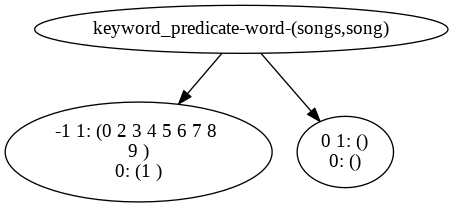



../optimal_debug/20230607202347_tree_brute_force_1_dot_file


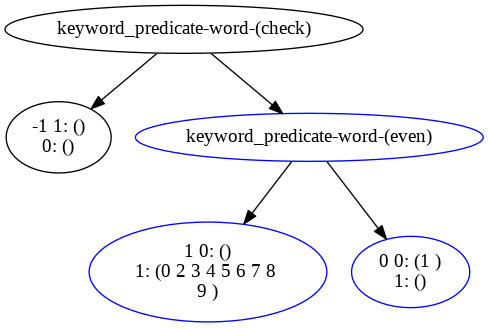



../optimal_debug/20230607202347_tree_brute_force_2_dot_file


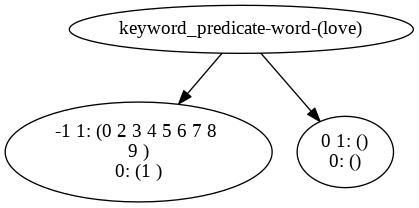



../optimal_debug/20230607202347_tree_brute_force_3_dot_file


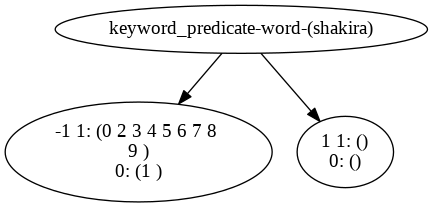



../optimal_debug/20230607202347_tree_brute_force_4_dot_file


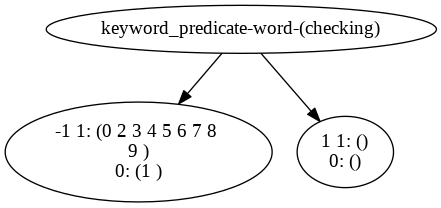



../optimal_debug/20230607202347_tree_brute_force_5_dot_file


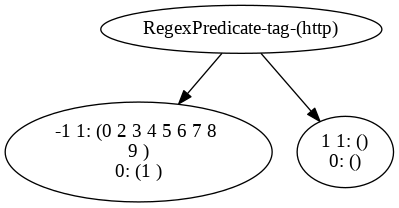



../optimal_debug/20230607202347_tree_brute_force_6_dot_file


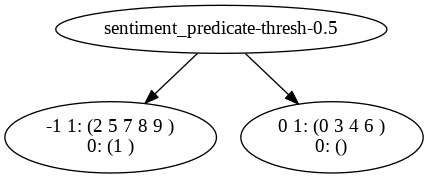



../optimal_debug/20230607202347_tree_brute_force_7_dot_file


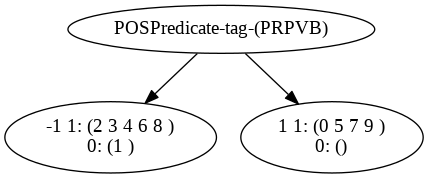



../optimal_debug/20230607202347_tree_brute_force_8_dot_file


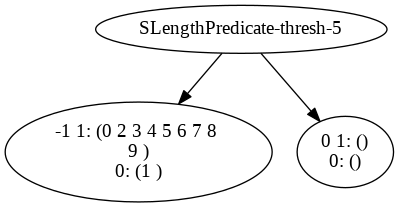



../optimal_debug/20230607202347_tree_brute_force_9_dot_file


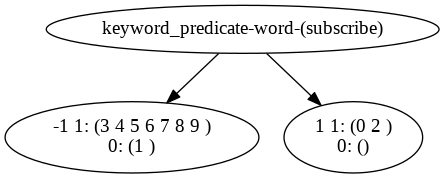

In [83]:
show_trees('../optimal_debug/')

In [81]:
f_optimal= glob.glob('../')[0]

In [82]:
pd.read_csv(f_optimal)

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cntnum_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo
brute_force,14.858,0.2,5,5,0.7,0.0,1.0,0.7,1539,1539,10,0.5,10,9


In [80]:
pd.read_csv('../optimal_test/sampled_complaints_20230605181016_optimal_20.csv')

,comment_id,author,date,old_text,expected_label,cid,text,model_pred,vectors,id
0,z13phrmwrkfisn5er22eyrbpbvaiwfvwf04,Gaming and Stuff PRO,2013-11-28T21:14:13,"Hello! Do you like gaming, art videos, scientific experiments, tutorials, lyrics videos, and much, much more of that? If you do please check out our channel and subscribe to it, we've just started, but soon we hope we will be able to cover all of our expectations... You can also check out what we've got so far!﻿",1,16,hello do you like gaming art videos scientific experiments tutorials lyrics videos and much much more of that if you do please check out our channel and subscribe to it we ve just started but soon we hope we will be able to cover all of our expectations you can also check out what we ve got so far,0,"-1,1,-1,-1,-1,-1,0,1,-1,1",0
1,z13tj514otzlurfbc04ccjwhrnmej1iihqw0k,Brandon Pryor,2014-01-19T00:36:25,I dont even watch it anymore i just come here to check on 2 Billion or not﻿,0,29,i dont even watch it anymore i just come here to check on billion or not,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,-1",1
2,z13ijjrgqqyqzfo2t23zfztbtlu4ghg5o04,Lil Misme,2014-08-09T03:01:25,Hey Guys this is Glamour Beauty! I just started my youtube channel please go check it out! I'm going to post singing videos and also random videos that I fell like! Please go to subscribe! More to come soon!. Remember to subscribe!﻿,1,364,hey guys this is glamour beauty i just started my youtube channel please go check it out i m going to post singing videos and also random videos that i fell like please go to subscribe more to come soon remember to subscribe,1,"-1,1,-1,-1,-1,-1,-1,-1,-1,1",2
3,LneaDw26bFs2gfQVXn0iARlUHD77c23Quer_0vQFKR4,Jacob Johnson,NaN,"You guys should check out this EXTRAORDINARY website called FIREPA.COM . You can make money online and start working from home today as I am! I am making over $3,000+ per month at FIREPA.COM ! Visit FIREPA.COM and check it out! Lake . Chillpal . Sturdy . Astauand . Johackle . Chorenn . Ethosien . Changeable . Public . Noxu . Ploosnar . Looplab . Hoppler . Delicious . False . Scitenoa . Locobot . Heartbreaking . Thirsty . Reminiscent",1,1270,you guys should check out this extraordinary website called firepa com you can make money online and start working from home today as i am i am making over per month at firepa com visit firepa com and check it out lake chillpal sturdy astauand johackle chorenn ethosien changeable public noxu ploosnar looplab hoppler delicious false scitenoa locobot heartbreaking thirsty reminiscent,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1",3
4,LneaDw26bFt_sZxaSVD4YYGDWlCcEfLjcNyYrRWcSrg,Eminem King of Rap !,NaN,Eminem is the king of rap Micheal Jackson is the king of pop If you also wanna go hard and wanna be the person of first class fame just check out Authenticviews*com and be famous just within days !! yO ~,1,1276,eminem is the king of rap micheal jackson is the king of pop if you also wanna go hard and wanna be the person of first class fame just check out authenticviews com and be famous just within days yo,0,"-1,1,-1,-1,-1,-1,0,-1,-1,-1",4
5,LneaDw26bFsMrQMk1vC-RxTxjmpFlt5sKz8Vo1_wIas,M.E.S,NaN,hey its M.E.S here I&#39;m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame. but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself. im just getting started so i really appreciate those who take time to leave constructive criticism i already got 200 subscribers and 4000 views on my first vid ive been told i have potential,1,1518,hey its m e s here i m a young up and coming rapper and i wanna get my music heard i know spam wont get me fame but at the moment i got no way of getting a little attention so please do me a favour and check out my channel and drop a sub if you enjoy yourself im just getting started so i really appreciate those who take time to leave constructive criticism i already got subscribers and views on

In [89]:
pd.read_csv('../optimal_debug_3/20230607211535_experiment_stats')

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo
0,brute_force,0.076,0.4,5,5,0.7,0.8,1.0,0.756,1539,1539,10,0.5,10,9


In [95]:
all_stats_diff_lfs_df = show_stats('../experiment_diff_num_lfs_607/')

In [96]:
all_stats_diff_num_complaints_df = show_stats('../exp_vary_user_input_and_comp_ratio607/')

In [103]:
all_stats_diff_lfs_df['user_input_size']=all_stats_diff_lfs_df['num_complaints']+\
all_stats_diff_lfs_df['confirmation_cnt']

all_stats_diff_lfs_df['complaint_ratio']=all_stats_diff_lfs_df['num_complaints']/ \
(all_stats_diff_lfs_df['confirmation_cnt']+all_stats_diff_lfs_df['num_complaints'])

all_stats_diff_lfs_df['confirmation_ratio']=all_stats_diff_lfs_df['confirmation_cnt']/ \
(all_stats_diff_lfs_df['confirmation_cnt']+all_stats_diff_lfs_df['num_complaints'])

In [101]:
all_stats_diff_num_complaints_df['user_input_size']=all_stats_diff_num_complaints_df['num_complaints']+\
all_stats_diff_num_complaints_df['confirmation_cnt']

all_stats_diff_num_complaints_df['complaint_ratio']=all_stats_diff_num_complaints_df['num_complaints']/ \
(all_stats_diff_num_complaints_df['confirmation_cnt']+all_stats_diff_num_complaints_df['num_complaints'])

all_stats_diff_num_complaints_df['confirmation_ratio']=all_stats_diff_num_complaints_df['confirmation_cnt']/ \
(all_stats_diff_num_complaints_df['confirmation_cnt']+all_stats_diff_num_complaints_df['num_complaints'])


In [102]:
all_stats_diff_num_complaints_df.groupby(['strat','user_input_size','complaint_ratio']).mean().reset_index()

,strat,user_input_size,complaint_ratio,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,confirmation_ratio
0,brute_force,5,0.0,0.020000,0.200000,0.0,5.0,0.7,1.000,1.000,0.699,1539.0,1539.0,10.0,0.5,10.0,9.0,1.0
1,brute_force,5,0.2,0.036333,0.400000,1.0,4.0,0.7,1.000,1.000,0.686,1539.0,1539.0,10.0,0.5,10.0,9.0,0.8
2,brute_force,5,0.4,0.027667,0.400000,2.0,3.0,0.7,0.000,1.000,0.734,1539.0,1539.0,10.0,0.5,10.0,9.0,0.6
3,brute_force,5,0.6,0.024667,0.600000,3.0,2.0,0.7,0.000,1.000,0.735,1539.0,1539.0,10.0,0.5,10.0,9.0,0.4
4,brute_force,5,0.8,0.020667,0.600000,4.0,1.0,0.7,1.000,0.000,0.303,1539.0,1539.0,10.0,0.5,10.0,9.0,0.2
5,brute_force,10,0.1,0.067333,0.400000,1.0,9.0,0.7,1.000,1.000,0.692,1539.0,1539.0,10.0,0.5,10.0,9.0,0.9
6,brute_force,10,0.3,0.066667,0.600000,3.0,7.0,0.7,0.667,1.000,0.692,1539.0,1539.0,10.0,0.5,10.0,9.0,0.7
7,brute_force,10,0.5,0.495667,0.571429,5.0,5.0,0.7,0.600,1.000,0.758,1539.0,1539.0,10.0,0.5,7.0,9.0,0.5
8,brute_force,10,0.7,0.114000,1.111111,7.0,3.0,0.7,1.000,0.333,0.313,1539.0,1539.0,10.0,0.5,9.0,9.0,0.3
9,brute_force,10,0.9,0.050000,1.000000,9.0,1.0,0.7,1.000,1.000,0.304,1539.0,1539.0,10.0,0.5,10.0,9.0,0.1


In [106]:
all_stats_diff_lfs_df.groupby(['strat','num_functions','complaint_ratio']).mean().reset_index()

,strat,num_functions,complaint_ratio,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,user_input_size,confirmation_ratio
0,brute_force,10,0.1,0.036667,0.200000,1.0,9.0,0.842,0.000,1.000,0.673,1060.0,1060.0,0.5,10.0,9.0,10.0,0.9
1,brute_force,10,0.3,0.025333,0.000000,3.0,7.0,0.842,0.000,1.000,0.842,1060.0,1060.0,0.5,10.0,9.0,10.0,0.7
2,brute_force,10,0.5,0.016000,0.000000,5.0,5.0,0.842,0.000,1.000,0.842,1060.0,1060.0,0.5,10.0,9.0,10.0,0.5
3,brute_force,10,0.7,0.018333,0.000000,7.0,3.0,0.842,0.000,1.000,0.842,1060.0,1060.0,0.5,10.0,9.0,10.0,0.3
4,brute_force,10,0.9,8.469667,0.000000,9.0,1.0,0.842,0.000,1.000,0.842,1060.0,1060.0,0.5,10.0,9.0,10.0,0.1
5,brute_force,20,0.1,0.065333,0.200000,1.0,9.0,0.599,1.000,1.000,0.696,1210.0,1210.0,0.5,20.0,19.0,10.0,0.9
6,brute_force,20,0.3,0.057333,0.400000,3.0,7.0,0.599,0.333,1.000,0.596,1210.0,1210.0,0.5,20.0,19.0,10.0,0.7
7,brute_force,20,0.5,0.042667,0.400000,5.0,5.0,0.599,0.200,1.000,0.596,1210.0,1210.0,0.5,20.0,19.0,10.0,0.5
8,brute_force,20,0.7,0.054333,0.500000,7.0,3.0,0.599,0.000,1.000,0.598,1210.0,1210.0,0.5,20.0,19.0,10.0,0.3
9,brute_force,20,0.9,0.050000,0.500000,9.0,1.0,0.599,0.667,1.000,0.733,1210.0,1210.0,0.5,20.0,19.0,10.0,0.1
